# Modeling
Model our data and then evaluate

In [1]:
# import packages

import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib
import plotly.figure_factory as ff
from IPython.core.display import display
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import joblib
# pd.set_option('display.max_columns', None)
# pd.reset_option('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

In [2]:
# import train, test, and transformer

train = np.load('../../data/processed/train.npz')
test = np.load('../../data/processed/test.npz')

ordinal_X = joblib.load('../../data/processed/ordinal_X')
ordinal_y = joblib.load('../../data/processed/ordinal_y')

/home/wkc/Documents/Springboard/Projects_and_Assignments/Mushroom-Classification/venv/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator OrdinalEncoder from version 0.24.0 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
# uncompress train archive
X_train = train[train.files[0]]
y_train = train[train.files[1]]

X_train, y_train

(array([[4., 2., 7., ..., 7., 4., 1.],
        [4., 3., 7., ..., 7., 4., 6.],
        [2., 2., 7., ..., 0., 4., 6.],
        ...,
        [3., 2., 0., ..., 1., 5., 3.],
        [0., 3., 3., ..., 7., 3., 0.],
        [4., 0., 3., ..., 7., 2., 0.]]),
 array([[1.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [4]:
# uncompress test archive
X_test = test[test.files[0]]
y_test = test[test.files[1]]

X_test, y_test

(array([[3., 0., 0., ..., 1., 4., 6.],
        [2., 0., 9., ..., 1., 4., 6.],
        [2., 3., 0., ..., 1., 4., 1.],
        ...,
        [3., 2., 2., ..., 7., 1., 6.],
        [0., 3., 0., ..., 1., 1., 1.],
        [2., 2., 3., ..., 0., 5., 6.]]),
 array([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [0.],
        [0.]]))

### model the data with random forest regressor


In [5]:
rf_pipe = Pipeline([('rf', RandomForestClassifier(random_state=42))])

rf_param_grid = {}

rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

/home/wkc/Documents/Springboard/Projects_and_Assignments/Mushroom-Classification/venv/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1, param_grid={})

In [6]:
train_accuracy = rf_grid.best_score_
train_std = rf_grid.cv_results_['std_test_score'][rf_grid.best_index_]

print('train accuracy:', train_accuracy, 'train std:', train_std)

train accuracy: 1.0 train std: 0.0


In [7]:
rf_best = rf_grid.best_estimator_
test_accuracy = rf_best.score(X_test, y_test)

print('test accuracy:', test_accuracy)

test accuracy: 1.0


Although this appears awkward seeing a 100% accuracy it is not surprising when working with a easy dataset with strong
relation between predictor and target variables as seen earlier.
Following with this strong accuracy score, we shall not need to proceed with hyperparameter tuning, becase we do not
want to overcomplicate our model when it appears to do very well.

Rather we should test if we can use even more simple models to replicate above results.
Also look at feature importances to show we could have even done with even lesser number of features

### Try to model with knn

In [8]:
knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, {}, cv=5, n_jobs=-1)

knn_grid.fit(X_train, y_train)

/home/wkc/Documents/Springboard/Projects_and_Assignments/Mushroom-Classification/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1, param_grid={})

In [9]:
knn_train_accuracy = knn_grid.best_score_
knn_train_std = knn_grid.cv_results_['std_test_score'][knn_grid.best_index_]

print('train accuracy:', knn_train_accuracy, 'train std:', knn_train_std)

train accuracy: 0.9976984495956407 train std: 0.0017558708873263433


In [10]:
knn_regular = knn_grid.best_estimator_
knn_regular.score(X_test, y_test)

0.9995069033530573

Not 100% but makes sense since ordinal encoder does not do as well on non-tree classifiers but still very well

### Model on a single decision tree


In [11]:
dt = DecisionTreeClassifier()

dt_grid = GridSearchCV(dt, {}, cv=5, n_jobs=-1)

dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1, param_grid={})

In [12]:
dt_train_accuracy = dt_grid.best_score_
dt_train_std = dt_grid.cv_results_['std_test_score'][dt_grid.best_index_]

print('train accuracy:', dt_train_accuracy, 'train std:', dt_train_std)

train accuracy: 1.0 train std: 0.0


In [13]:
dt_regular = dt_grid.best_estimator_
dt_regular.score(X_test, y_test)

1.0

It shows that we do not even need an ensemble method and can just work with a single decision tree

In [16]:
mushroom = pd.read_csv('../../data/processed/mushroom_imputed_2_adj.csv')
cols = mushroom.drop('Class', axis=1).columns
cols

Index(['Cap-Shape', 'Cap-Surface', 'Cap-Color', 'Bruises', 'Odor',
       'Gill-Attachment', 'Gill-Spacing', 'Gill-Size', 'Gill-Color',
       'Stalk-Shape', 'Stalk-Root', 'Stalk-Surface-Above-Ring',
       'Stalk-Surface-Below-Ring', 'Stalk-Color-Above-Ring',
       'Stalk-Color-Below-Ring', 'Veil-Color', 'Ring-Number', 'Ring-Type',
       'Spore-Print-Color', 'Population', 'Habitat'],
      dtype='object')

In [22]:
feat_imp = pd.Series(dt_regular.feature_importances_, index=cols).sort_values(ascending=False)
feat_imp

Spore-Print-Color           0.534042
Ring-Number                 0.168971
Gill-Size                   0.138720
Veil-Color                  0.045050
Gill-Spacing                0.032712
Habitat                     0.018271
Odor                        0.015691
Cap-Surface                 0.014696
Stalk-Shape                 0.010488
Bruises                     0.008981
Population                  0.006637
Stalk-Surface-Below-Ring    0.005741
Stalk-Color-Below-Ring      0.000000
Ring-Type                   0.000000
Cap-Shape                   0.000000
Stalk-Color-Above-Ring      0.000000
Stalk-Surface-Above-Ring    0.000000
Gill-Color                  0.000000
Gill-Attachment             0.000000
Cap-Color                   0.000000
Stalk-Root                  0.000000
dtype: float64

Text(0, 0.5, 'Feature Importance Value')

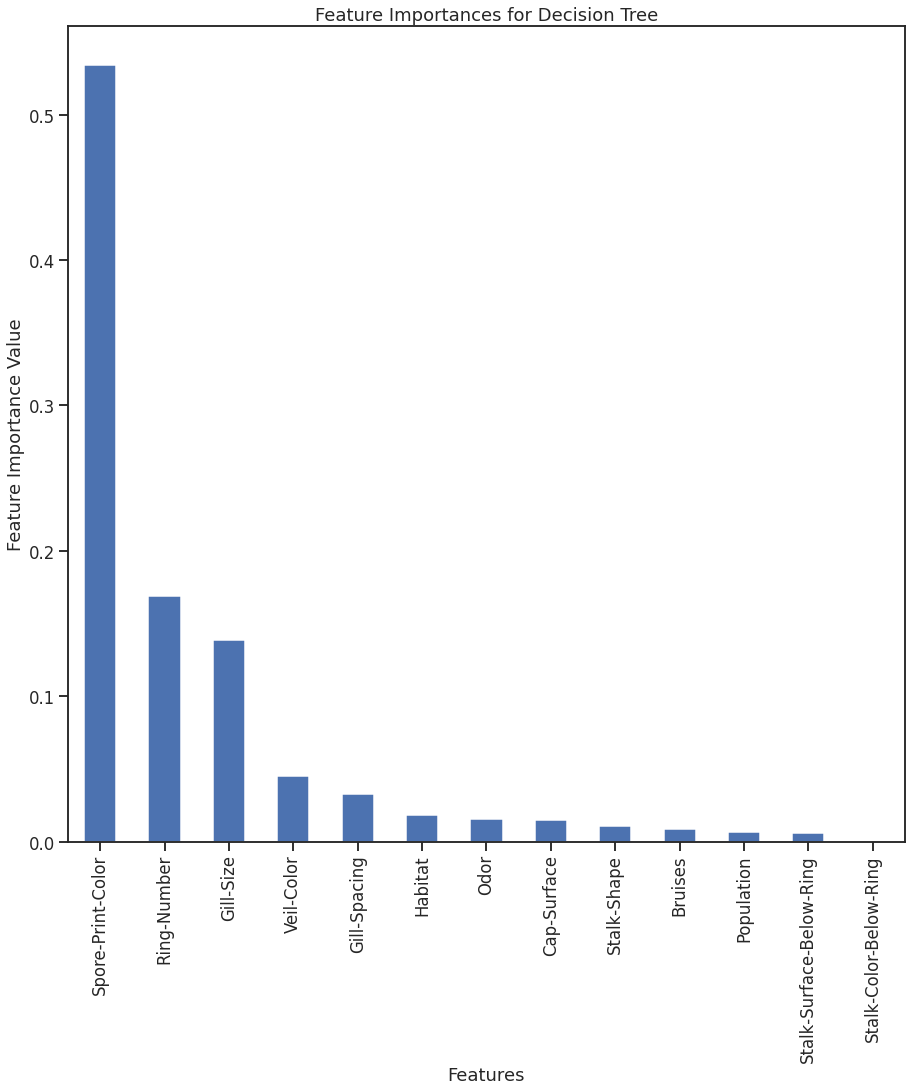

In [30]:
plt.figure(figsize=(15,15))
feat_imp[:13].plot(kind='bar')
plt.title('13 top Feature Importances for Decision Tree')
plt.xlabel('Features')
plt.ylabel('Feature Importance Value')


In [34]:
sum(feat_imp[:3].values)

0.8417335745440734

Most of the variance in our model can be explained by three features, spore print color, ring number, and gill size
which is surprising as odor was correlated for us but this model doesn't find it as important when it is classifying


In [38]:
# Code to get retrieve the top 3 columns that are considered most important in identifying edibility
top_feat = feat_imp.index[:3].tolist()
top_feat

['Spore-Print-Color', 'Ring-Number', 'Gill-Size']

In [50]:
# This is used to get an array of the index for best features, this is because our Xtrain is a transformed numpy array
# and we cannot simply just grab the columns by name and need to be name
best_index = []

for feat in top_feat:
    best_index.append(mushroom.drop('Class', axis=1).columns.get_loc(feat))

best_index


[18, 16, 7]

In [85]:
X_train_top_feats = X_train[:, best_index]
X_test_top_feats = X_test[:, best_index]

In [86]:
dt_grid2 = GridSearchCV(dt, {}, cv=5, n_jobs=-1)
dt_grid2.fit(X_train_top_feats, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1, param_grid={})

In [87]:
dt2_train_accuracy = dt_grid2.best_score_
dt2_train_std = dt_grid2.cv_results_['std_test_score'][dt_grid2.best_index_]

print('train accuracy:', dt2_train_accuracy, 'train std:', dt2_train_std)

train accuracy: 0.9784686783721837 train std: 0.002999983867124824


In [89]:
dt2_regular = dt_grid2.best_estimator_
dt2_regular.score(X_test_top_feats, y_test)

0.9699211045364892

With 3 Features It seems our train and test overfits by 1% which seems insignificant as
the accuracy is still around 96% which is high.
In terms of the problem scenario because we ard dealing with edibility of mushrooms we rather have a higher precision
than recall, if our positive class edibility. This means that we should use all features for a 100% when gauging for
edibility of mushrooms; and even a more complex like random forest classifier would be considered over a decision tree.


# save all models


In [90]:
joblib.dump(rf_best, r'../../model/rf_model_classifier')
joblib.dump(knn_regular, r'../../model/knn_model_classifier')
joblib.dump(dt_regular, r'../../model/dt_model_classifier')
joblib.dump(dt2_regular, r'../../model/dt_top_feats_model_classifier')

['../../model/dt_top_feats_model_classifier']

Do more evaluation looking at confusion matrix
